In [1]:
# import storypy
from storypy.preprocess import ESMValProcessor, parse_config
from esmvaltool.diag_scripts.shared import run_diagnostic, get_cfg, group_metadata
from esmvaltool.diag_scripts.shared._base import _get_input_data_files

In [2]:
user_config = dict(
        work_dir='/climca/people/ralawode/esmvaltool_output/edj_recipe_20251021_161158/work',
        plot_dir='/climca/people/ralawode/esmvaltool_output/edj_recipe_20251021_161158/plots',
        var_name=['u850'],
        exp_name='ssp585',
        freq='mon',
        grid='g025',
        region_method='box',
        period1 = ['1950', '1979'],
        period2 = ['2070', '2099'],
        region_id=18,
        season=(6, 7, 8),  # Now provided as a tuple of months
        region_extents=[(25, 90, -180, 180)],# (35, 60, -60, 0)],
        # box=(-20,60,20,60),
        titles=["Region A", "Region B"]
    )
"""
driver_config = dict(
        var_name=['psl'],            # <- actual variable names in NetCDF
        short_name=['test_ubi'],           # <- names for regression/CSV outputs
        period1=['1960', '1979'],
        period2=['2070', '2099'],
        season=[12,1,2],
        box={'lat_min': 50, 'lat_max': 70, 'lon_min': 40, 'lon_max': 70},
        work_dir='/climca/people/storylinetool/test_user/driver_test_outputs'
    )
"""
# Load the configuration file
config= parse_config('/climca/people/ralawode/esmvaltool_output/edj_recipe_20251021_161158/run/storyline_analysis/remote_drivers/settings.yml')

In [3]:
processor_target = ESMValProcessor(config, user_config)

In [ ]:
processor_target.process_var()

In [6]:
from storypy.compute import run_regression

main_config = dict(
        work_dir='/climca/people/ralawode/esmvaltool_output/edj_recipe_20251021_161158/work',
        target_variable=['pr']
    )

outputs = run_regression(main_config)

This is regressor_coefs: <xarray.Dataset> Size: 163kB
Dimensions:  (lat: 28, lon: 144)
Coordinates:
  * lat      (lat) float64 224B 21.25 23.75 26.25 28.75 ... 83.75 86.25 88.75
  * lon      (lon) float64 1kB -178.8 -176.2 -173.8 -171.2 ... 173.8 176.2 178.8
    height   float64 8B 2.0
Data variables:
    pr       (lat, lon) float64 32kB -0.0235 -0.03447 ... 0.09292 0.09269
    pw_high  (lat, lon) float64 32kB 0.01593 0.006504 ... 0.08389 0.08422
    pw_low   (lat, lon) float64 32kB -0.07171 -0.08807 ... -0.01966 -0.01941
    ta_high  (lat, lon) float64 32kB -0.05456 -0.02859 ... 0.03466 0.03429
    ta_low   (lat, lon) float64 32kB 0.1094 0.1039 0.09599 ... -0.0994 -0.09972
Regression completed for: pr


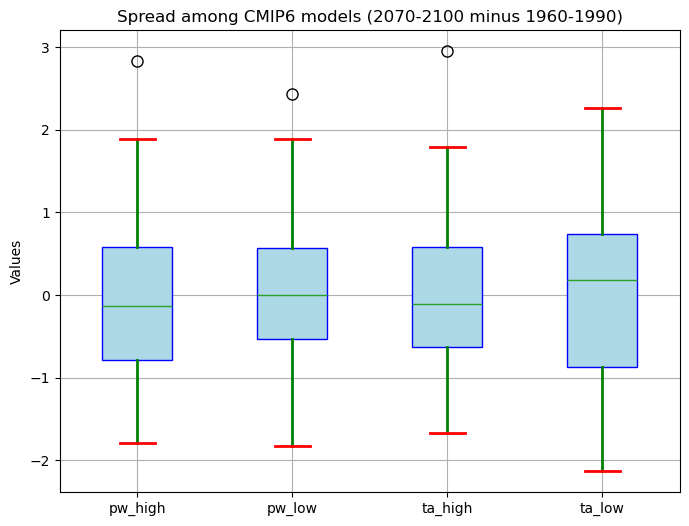

In [2]:
# Make a boxplot.
from storypy.data import read_drivers
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os
# Plot boxplot of Tropical Warming, Polar Warming and Stratospheric Polar Vortex

user_config = dict(
        work_dir='/climca/people/ralawode/esmvaltool_output/edj_recipe_20251021_161158/work',
        plot_dir='/climca/people/ralawode/esmvaltool_output/edj_recipe_20251021_161158/plots'
    )

# Directly read the drivers from the output file in the work_dir.
driver_path = os.path.join(user_config['work_dir'], "storyline_analysis/multiple_regresion/remote_drivers/scaled_standardized_drivers.csv")
rds = pd.read_csv(driver_path, index_col=0)

models = rds.index.tolist()
# Boxplot with customizations
plt.figure(figsize=(8, 6))
rds.boxplot(patch_artist=True, 
           boxprops=dict(facecolor='lightblue', color='blue'),
           whiskerprops=dict(color='green', linewidth=2),
           capprops=dict(color='red', linewidth=2),
           flierprops=dict(marker='o', color='black', markersize=8))

plt.title('Spread among CMIP6 models (2070-2100 minus 1960-1990)')
plt.ylabel('Values')
plt.show()

In [ ]:
from storypy.evaluate.plot import hemispheric_plot
import os
import xarray as xr
import numpy as np

# Or directly read the data from the output file in the work_dir.
data_path = os.path.join(user_config['work_dir'], "regression_output/u850/R2.nc")
data = xr.open_dataset(data_path).u850 * 200

levels = np.arange(0, 100, 10)
extent=[-180, 180, 20, 90]
hemispheric_plot(data, levels, extent, cmap="OrRd", title="Variance (R2) in CMIP6 for Cold Season Precipitation", colorbar_label="R2 coefficient")

In [ ]:
from storypy.evaluate.plot import hemispheric_plot
import os
import xarray as xr
import numpy as np

# Or directly read the data from the output file in the work_dir.
data_path = os.path.join(user_config['work_dir'], "regression_output/pr/R2.nc")
data = xr.open_dataset(data_path).pr * 200

levels = np.arange(0, 100, 10)
extent=[-180, 180, 20, 90]
hemispheric_plot(data, levels, extent, cmap="OrRd", title="Variance (R2) in CMIP6 for Cold Season Precipitation", colorbar_label="R2 coefficient")

In [ ]:
# from storypy.data import read_pr_regression_coefficients
from storypy.evaluate.plot import create_three_panel_figure, regression_coefficient, create_multi_panel_figure
import numpy as np

target = 'pr'
drivers = ['ta', 'pw', 'spv']
storyline_coefficient = 1.26

coefficients, titles = regression_coefficient(user_config, target, drivers, storyline_coefficient)

levels = [np.arange(-.08, .09, .01)] * 3
extent = [user_config["box"]] * 3
cmaps = ['PuOr'] * 3

# titles = ['Polar Amplification','Tropical amplification','Stratospheric Polar Vortex']
fig = create_multi_panel_figure(coefficients, extent, cmaps, titles, colorbar_label="mm/day/K")

In [ ]:
# from storypy.data import read_pr_regression_coefficients
from storypy.evaluate.plot import create_three_panel_figure, regression_coefficient, create_multi_panel_figure
import numpy as np

target = 'u850'
drivers = ['ta', 'pw', 'spv']
storyline_coefficient = 1.26

coefficients, titles = regression_coefficient(user_config, target, drivers, storyline_coefficient)

levels = [np.arange(-.08, .09, .01)] * 3
extent = [user_config["box"]] * 3
cmaps = ['RdBu_r'] * 3

# titles = ['Polar Amplification','Tropical amplification','Stratospheric Polar Vortex']
fig = create_multi_panel_figure(coefficients, extent, cmaps, titles, colorbar_label="mm/day/K")

In [ ]:
from storypy.evaluate.plot import create_five_panel_figure, storyline_evaluation

target = 'pr'
drivers = ['ta', 'spv']

# --- Call the function ---
storyline_coefficient = 1.26
storylines, titles = storyline_evaluation(user_config, target, drivers, storyline_coefficient)

# --- Plotting setup ---
cmaps = ['PuOr'] * 5
levels = [np.arange(-.3, .35, .05)] * 5
extent = [user_config["box"]] * 5

fig = create_five_panel_figure(
    storylines, extent, levels, cmaps, titles,
    colorbar_label="mm/day/K"
)

In [ ]:
from storypy.evaluate.plot import create_five_panel_figure, storyline_evaluation

target = 'u850'
drivers = ['ta', 'spv']

# --- Call the function ---
storyline_coefficient = 1.26
storylines, titles = storyline_evaluation(user_config, target, drivers, storyline_coefficient)

# --- Plotting setup ---
cmaps = ['RdBu_r'] * 5
levels = [np.arange(-.3, .35, .05)] * 5
extent = [user_config["box"]] * 5

fig = create_five_panel_figure(
    storylines, extent, levels, cmaps, titles,
    colorbar_label="mm/day/K"
)

In [ ]:
from storypy.evaluate.plot import plot_ellipse
import pandas as pd

driver_path = os.path.join(user_config['work_dir'], "storyline_analysis/multiple_regresion/remote_drivers/scaled_standardized_drivers.csv")
rds = pd.read_csv(driver_path, index_col=0).dropna()

models = rds.index.tolist()
fig = plot_ellipse(models,rds["ta"].values,rds["spv"].values,corr="no",x_label="Tropical warming",y_label="Stratospheric polar vortex",)